#### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['pdf.use14corefonts'] = True

#### roots and global variables

In [3]:
root = '../'
behavioural_data_root = root + 'Datasets/behavioral_data/selected_data/' 
dataset_path_ft = root + "Datasets/AI Models Results/fastText_FC.csv"
dataset_path_bert = root + "Datasets/AI Models Results/BERT.csv"

#### Preparing Data 

Loading words and non-words with zipf and predicted probabilities

In [4]:
word_nword_df_FT = pd.read_csv(dataset_path_ft,
                            header=None,
                            names =['string', 'freq',  'label', 'zipf',
                                    'category', 'FastText_word_prob', 'FastText_non_word_prob'])

word_nword_df_BERT = pd.read_csv(dataset_path_bert,
                            header=None,
                            names =['string', 'freq',  'label', 'zipf',
                                    'category', 'BERT_word_prob', 'BERT_non_word_prob'])
word_nword_df = pd.merge(word_nword_df_FT,
                         word_nword_df_BERT[["string", "BERT_word_prob", "BERT_non_word_prob"]],
                         on='string', how='left').dropna().reset_index(drop=True)

In [5]:
word_nword_df.head()

,string,freq,label,zipf,category,FastText_word_prob,FastText_non_word_prob,BERT_word_prob,BERT_non_word_prob
0,Ipe's,0,0,0.000000,NW,6.484266e-08,1.000000,0.000191,0.999809
1,toothcamb,0,0,0.000000,NW,4.641062e-05,0.999954,0.588356,0.411644
2,flicks,702,1,2.935287,LF,9.993498e-01,0.000650,0.969857,0.030143
3,Samoar,0,0,0.000000,NW,1.966545e-06,0.999998,0.020559,0.979441
4,lastened,0,0,0.000000,NW,1.107923e-04,0.999889,0.011418,0.988582


In [6]:
# Reading LDT Data
behavioural_df = pd.read_csv(behavioural_data_root + 'LDT_data.csv',
                             header=None,
                             names=['accuracy', 'rt', 'string', 'response',
                                    'participant', 'minRT', 'participant_id'])
# Merging  behavioral dataframe with word_nonword_df to have words and non-words data with behavioral data
behavioural_df = pd.merge(behavioural_df, word_nword_df, on='string',
                          how='left').dropna().reset_index(drop=True)
behavioural_df = behavioural_df.drop(["freq", "participant"], axis=1)

In [7]:
behavioural_df.head()

,accuracy,rt,string,response,minRT,participant_id,label,zipf,category,FastText_word_prob,FastText_non_word_prob,BERT_word_prob,BERT_non_word_prob
0,1,0.422,sand,1,0.422,1,1.0,4.307194,HF,0.999509,0.000491,0.999993,7.448991e-06
1,1,0.462,textbook,1,0.422,1,1.0,3.344913,HF,0.999996,0.000003,0.999995,5.534554e-06
2,0,0.490,carmed,1,0.422,1,0.0,0.000000,NW,0.000087,0.999913,0.021928,9.780724e-01
3,1,0.503,pain,1,0.422,1,1.0,4.990457,HF,0.999988,0.000012,0.999925,7.514760e-05
4,1,0.513,technical,1,0.422,1,1.0,3.916116,HF,0.999640,0.000360,1.000000,5.702559e-08


#### Predicted probabilities of words and non-words in different conditions in all trials across participants

In [8]:
behavioural_df.groupby(['category']).agg({'FastText_word_prob': ['mean', 'std', 'count'],
                                          'FastText_non_word_prob': ['mean', 'std', 'count'],
                                          'BERT_word_prob': ['mean', 'std', 'count'],
                                          'BERT_non_word_prob': ['mean', 'std', 'count']})

FastText_word_prob                  FastText_non_word_prob            \
                       mean       std  count                   mean       std   
category                                                                        
HF                 0.994981  0.041910   7950               0.005019  0.041910   
LF                 0.991762  0.059518   9676               0.008238  0.059518   
NW                 0.010288  0.066056  19160               0.989712  0.066056   

                BERT_word_prob                  BERT_non_word_prob            \
          count           mean       std  count               mean       std   
category                                                                       
HF         7950       0.971088  0.109867   7950           0.028912  0.109867   
LF         9676       0.852712  0.242358   9676           0.147288  0.242358   
NW        19160       0.069216  0.156124  19160           0.930784  0.156124   

                 
          count  
category         
HF         7950  
LF         9676  
NW        19160

#### RT and response description of words and non-words in different conditions in all trials across participants

In [9]:
behavioural_df.groupby(['category']).agg({'rt': ['mean', 'std', 'max', 'min'],
                                          'response': ['mean', 'std']})

rt                          response          
              mean       std    max    min      mean       std
category                                                      
HF        0.681454  0.258174  2.996  0.203  0.947673  0.222700
LF        0.814440  0.325741  2.925  0.200  0.803121  0.397661
NW        0.850204  0.324849  2.990  0.200  0.137317  0.344191

In [11]:
words = behavioural_df.loc[behavioural_df['category']!='NW'].copy()
words['response'].replace([1, 0], ["Word", "Non Word"], inplace=True)

#### RT and Zipf relation in of all word trials

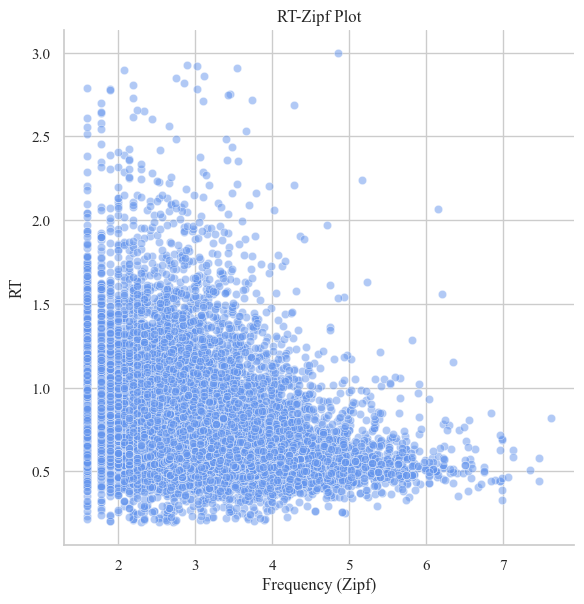

In [12]:
g = sns.relplot(x='zipf', y='rt', alpha=.5, height=6,
                data=words, color='cornflowerblue')
plt.title("RT-Zipf Plot")
g.set_xlabels("Frequency (Zipf)")
g.set_ylabels("RT")

#### RT and Zipf relation in all word trials for participants' word response and nonword response

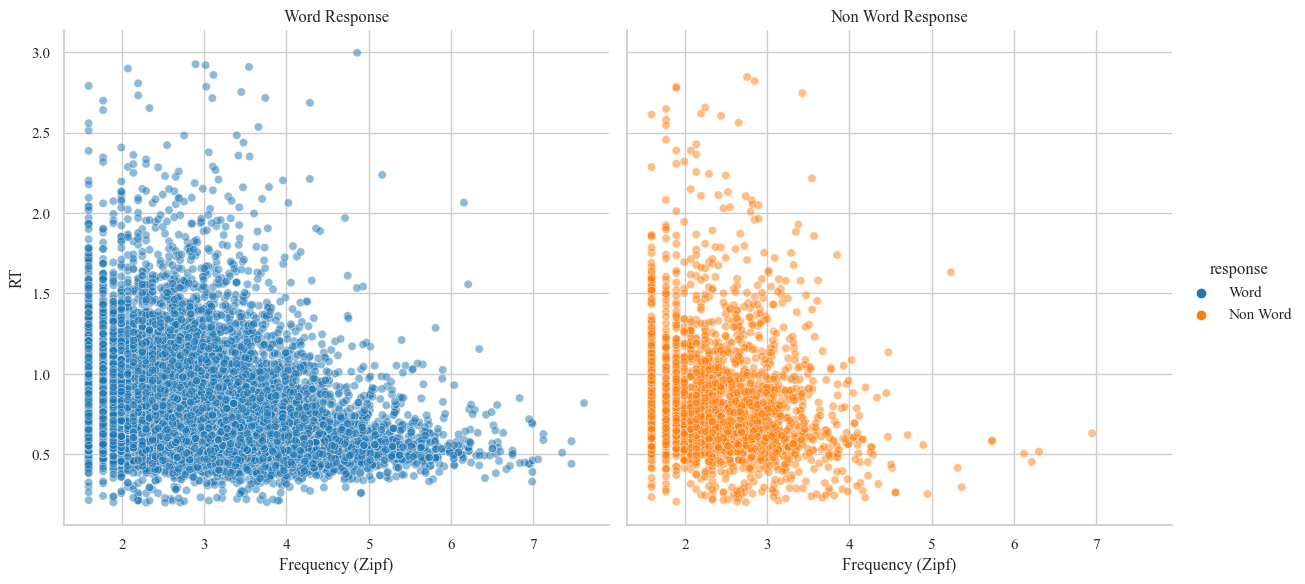

In [14]:
g = sns.relplot(x='zipf', y='rt', hue='response',
                col='response', alpha=.5, palette='tab10',
                height=6, data=words)

g.set_titles("{col_name} Response")
g.set_xlabels("Frequency (Zipf)")
g.set_ylabels("RT")
plt.savefig("./Results/Plots/Zipf/" + "zipf_relation.pdf")